In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!wandb login 9676e3cc95066e4865586082971f2653245f09b4

Appending key for api.wandb.ai to your netrc file: /Users/guydavidson/.netrc
Successfully logged in to Weights & Biases!


In [3]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.special import factorial

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import path as mpath
import matplotlib.gridspec as gridspec

import pickle
import tabulate
import wandb
from collections import namedtuple

import meta_learning_data_analysis as analysis
import meta_learning_analysis_plots as plots

In [4]:
np.set_printoptions(linewidth=160)
# Avoid escaping any latex characters
tabulate.LATEX_ESCAPE_RULES = {}

MIN_FONT_SIZE = 14
LABELS_FONT_SIZE = 20
TITLE_FONT_SIZE = 24

matplotlib.rcParams.update({'font.size': MIN_FONT_SIZE})
FONT_DICT = dict(fontsize=LABELS_FONT_SIZE) 
TITLE_FONT_DICT = dict(fontsize=TITLE_FONT_SIZE)

PER_PLOT_WIDTH = 6

QUERY_ORDINAL_POSITION_COMORLAP= 'cool'
NUM_TIMES_TRAINED_COLORMAP = 'copper'

In [5]:
cache = analysis.refresh_cache()
print(cache.keys())

six_replications_analyses = cache['six_replications_analyses']
# query_mod_replications = cache['query_mod_replications']
control_analyses = cache['control_analyses']
six_replications_updated_analyses = cache['six_replications_updated_analyses']
control_updated_analyses = cache['updated_control_analyses']
query_mod_updated_analyses = cache['query_mod_updated_analyses']

dict_keys(['six_replications_analyses', 'control_analyses', 'query_mod_replications', 'six_replications_updated_analyses', 'updated_control_analyses', 'query_mod_updated_analyses', 'forgetting_curves_raw_data', 'preliminary_maml_analyses', 'baseline_maml_comparison_analyses', 'maml_analyses', 'maml_alpha_0_analyses', 'maml_meta_test_analyses'])


----

# Raw accuracy plots

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/accuracy_by_times_trained_1.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-accuracy-by-times-trained-1}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/edm/accuracy_by_times_trained_1.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-accuracy-by-times-trained-1}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/accuracy_by_tasks_trained_1.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-accuracy-by-tasks-trained-1}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spaci

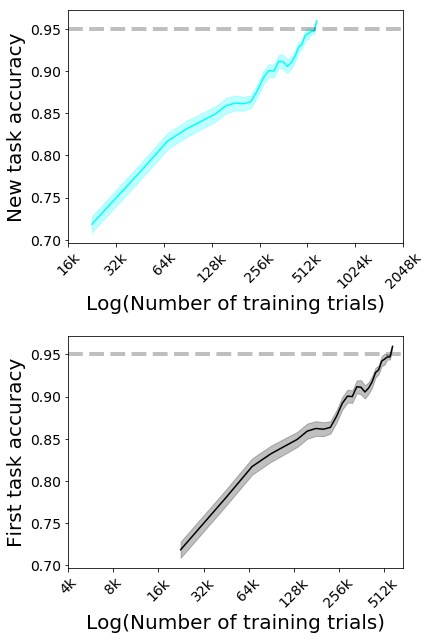

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/accuracy_by_times_trained_2.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-accuracy-by-times-trained-2}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/edm/accuracy_by_times_trained_2.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-accuracy-by-times-trained-2}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/accuracy_by_tasks_trained_2.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-accuracy-by-tasks-trained-2}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spaci

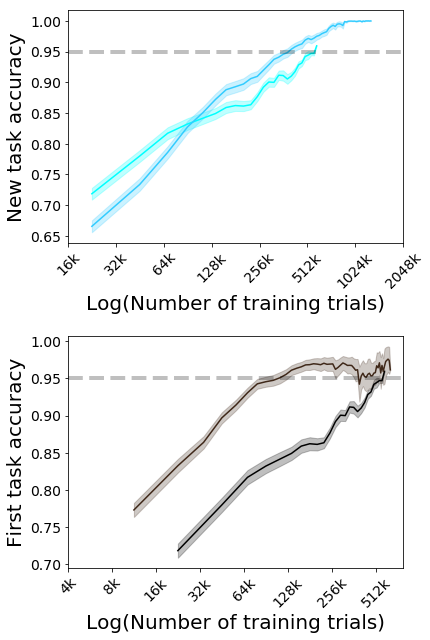

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/accuracy_by_times_trained_3.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-accuracy-by-times-trained-3}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/edm/accuracy_by_times_trained_3.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-accuracy-by-times-trained-3}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/accuracy_by_tasks_trained_3.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-accuracy-by-tasks-trained-3}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spaci

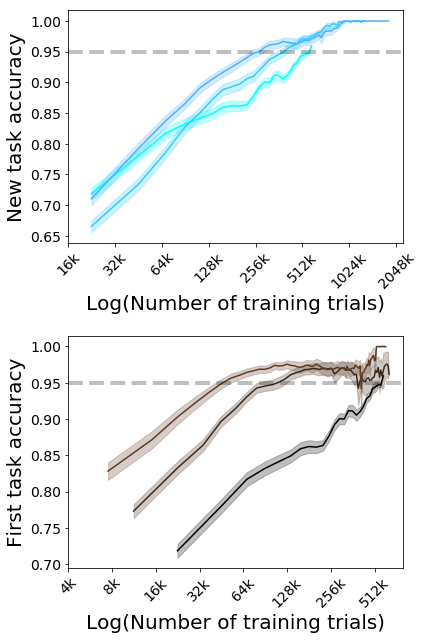

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/accuracy_by_times_trained_9.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-accuracy-by-times-trained-9}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/edm/accuracy_by_times_trained_9.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-accuracy-by-times-trained-9}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/accuracy_by_tasks_trained_9.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-accuracy-by-tasks-trained-9}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spaci

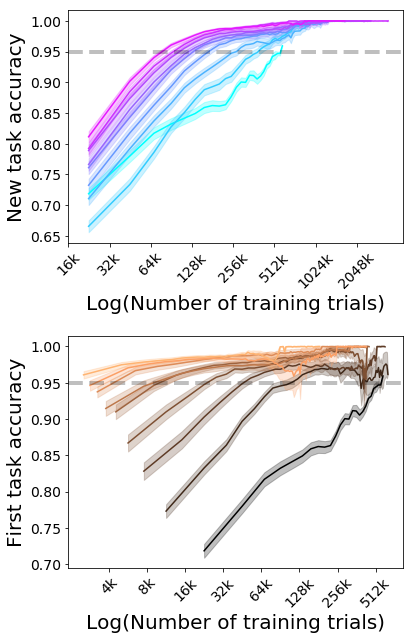

In [33]:
for num_plots in (1, 2, 3, 9):
    plots.both_raw_accuracy_plots(six_replications_analyses, '',
                                  shade_error=True, font_dict=FONT_DICT, log_x=True,
                                  new_task_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                  first_task_colormap=NUM_TIMES_TRAINED_COLORMAP, title_font_dict=TITLE_FONT_DICT,
                                  hline_y=0.95, first_task_title='', new_task_title='', add_colorbars=False,
                                  num_tasks_to_plot=num_plots + 1, 
                                  save_path=[f'edm/accuracy_by_times_trained_{num_plots}.pdf', 
                                             f'edm/accuracy_by_tasks_trained_{num_plots}.pdf'])


----

# Examples to criterion

1 1
[ 1  2  3  4  5  6  7  8  9 10]
[11.63098713 12.40168605 10.89650431 10.00693237  9.44438986  8.93799596  8.75710473  8.45724648  8.27051281  8.08932579]
Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/examples_to_criterion_by_times_trained_1.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-examples-to-criterion-by-times-trained-1}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/edm/examples_to_criterion_by_times_trained_1.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-examples-to-criterion-by-times-trained-1}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/examples_to_criterion_by_tasks_traine

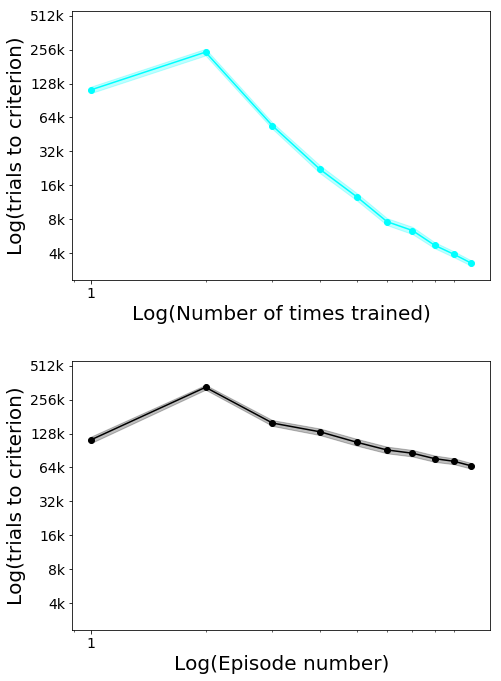

2 2
[ 1  2  3  4  5  6  7  8  9 10]
[11.63098713 12.40168605 10.89650431 10.00693237  9.44438986  8.93799596  8.75710473  8.45724648  8.27051281  8.08932579]
[1 2 3 4 5 6 7 8 9]
[12.7040465  11.15432057 10.20635305  9.65572906  9.09740284  8.86444866  8.51568365  8.31526307  8.08612717]
Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/examples_to_criterion_by_times_trained_2.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-examples-to-criterion-by-times-trained-2}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/edm/examples_to_criterion_by_times_trained_2.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-examples-to-criterion-by-times-trained-2}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}

Figure:

\begin{figure}[!h

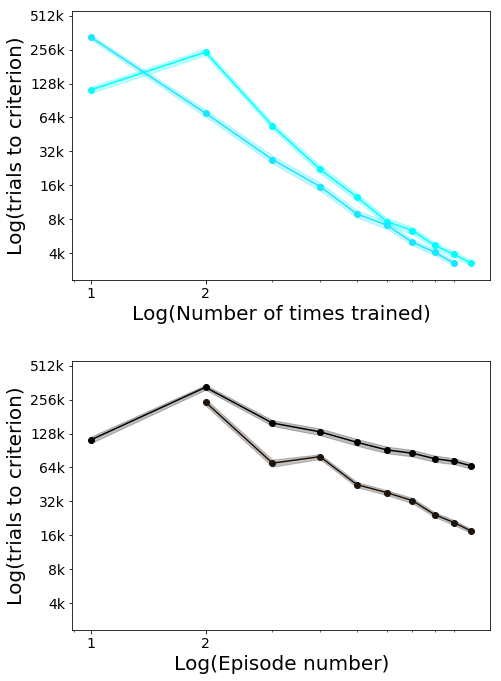

3 3
[ 1  2  3  4  5  6  7  8  9 10]
[11.63098713 12.40168605 10.89650431 10.00693237  9.44438986  8.93799596  8.75710473  8.45724648  8.27051281  8.08932579]
[1 2 3 4 5 6 7 8 9]
[12.7040465  11.15432057 10.20635305  9.65572906  9.09740284  8.86444866  8.51568365  8.31526307  8.08612717]
[1 2 3 4 5 6 7 8]
[11.97389757 11.2876718  10.63385058  9.87999719  9.39842528  8.88345593  8.54784882  8.2991042 ]
Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/examples_to_criterion_by_times_trained_3.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-examples-to-criterion-by-times-trained-3}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/edm/examples_to_criterion_by_times_trained_3.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-ex

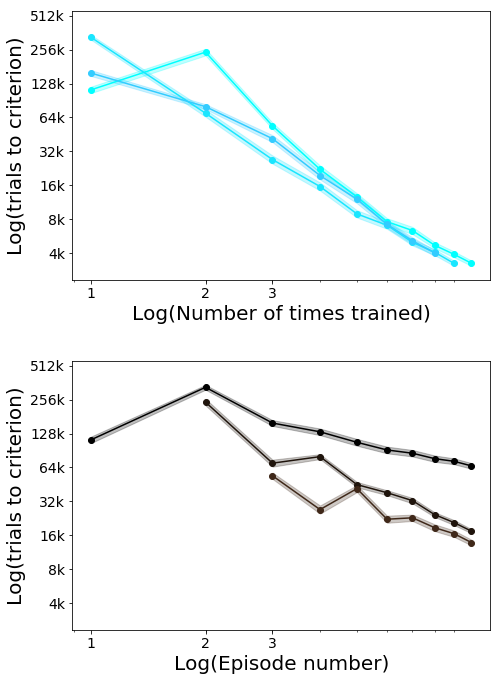

10 10
[ 1  2  3  4  5  6  7  8  9 10]
[11.63098713 12.40168605 10.89650431 10.00693237  9.44438986  8.93799596  8.75710473  8.45724648  8.27051281  8.08932579]
[1 2 3 4 5 6 7 8 9]
[12.7040465  11.15432057 10.20635305  9.65572906  9.09740284  8.86444866  8.51568365  8.31526307  8.08612717]
[1 2 3 4 5 6 7 8]
[11.97389757 11.2876718  10.63385058  9.87999719  9.39842528  8.88345593  8.54784882  8.2991042 ]
[1 2 3 4 5 6 7]
[11.79488101 10.71616373 10.00918555  9.41171163  8.89012507  8.51970685  8.20872952]
[1 2 3 4 5 6]
[11.58078096 10.55083268 10.03811993  9.29566018  8.82208594  8.46251226]
[1 2 3 4 5]
[11.42392264 10.38897623  9.83707004  9.17175173  8.69095041]
[1 2 3 4]
[11.35743391 10.10400963  9.71408274  9.06744507]
[1 2 3]
[11.24692473  9.9408      9.53278421]
[1 2]
[11.19242114  9.76524408]
[1]
[11.09858258]
Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/examples_to_criterion_by_times_trained_10.pdf}
\caption

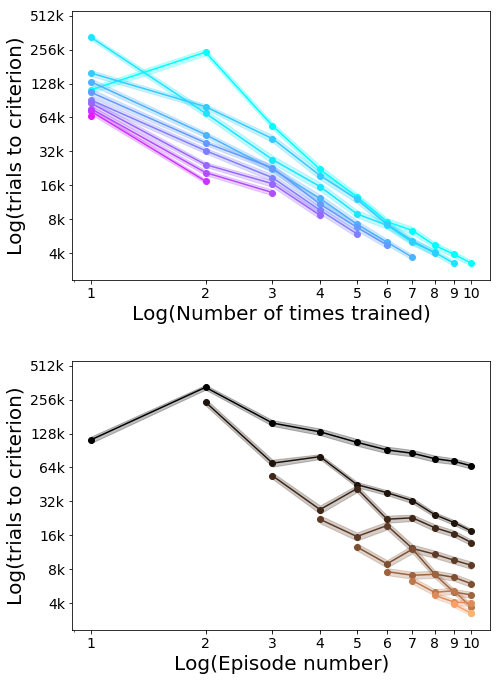

In [34]:
LOG_PLOT_YLIM = (7.75, 13.25)

for num_plots in (1, 2, 3, 10):
    plots.plot_processed_results_all_dimensions(six_replications_analyses, data_index=1, 
                                                title='',
                                                ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(60, 60, 60, 180), shade_error=True,
                                                font_dict=FONT_DICT, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                                dimension_names=('',), dimension_indices=(3,),
                                                add_colorbars=False,
                                                title_font_dict=TITLE_FONT_DICT, 
                                                num_tasks_to_plot=num_plots, 
                                                save_path=[f'edm/examples_to_criterion_by_times_trained_{num_plots}.pdf', 
                                                           f'edm/examples_to_criterion_by_tasks_trained_{num_plots}.pdf'])

----

# Forgetting Curves

In [39]:
forgetting_curves_raw_data = cache['forgetting_curves_raw_data']
first_task_colormap = plt.get_cmap(NUM_TIMES_TRAINED_COLORMAP)

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/forgetting_curves_1.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-forgetting-curves-1}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/edm/forgetting_curves_1.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-forgetting-curves-1}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/edm/forgetting_curves_2.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-edm-forgetting-curves-2}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\

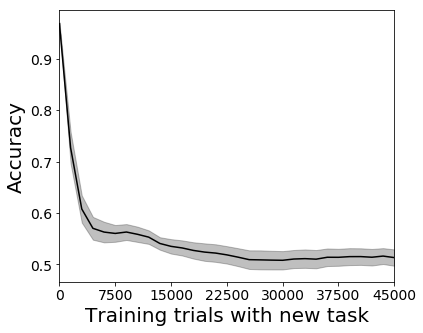

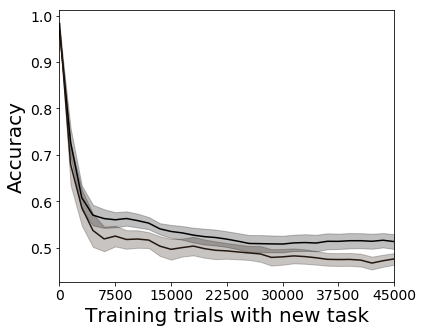

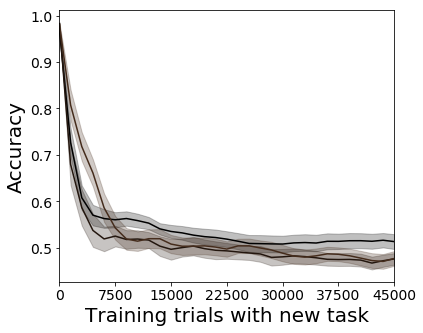

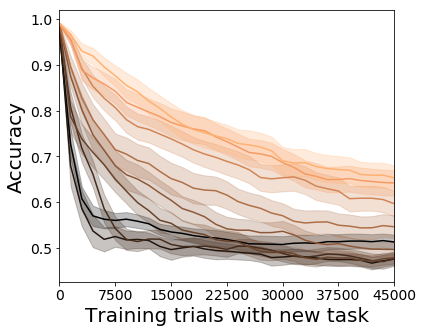

In [42]:
num_tasks = 10

for num_plots in (1, 2, 3, 9):
    figure = plt.figure(figsize=(6, 5))
    first_task_ax = figure.gca()

    for episode_num in range(1, num_plots + 1):
        first_task_times_trained = episode_num - 1
        episode_first_task = forgetting_curves_raw_data[:, first_task_times_trained, episode_num]
        x_values = np.arange(episode_first_task.shape[1])
        mean = np.nanmean(episode_first_task, axis=0)
        std = np.nanstd(episode_first_task, axis=0)
        n = episode_first_task.shape[1] - np.isnan(episode_num).sum(axis=0)
        sem = np.divide(std, n ** 0.5)
        color = first_task_colormap((episode_num - 1) / (num_tasks - 1))

        first_task_ax.plot(x_values, mean, color=color) 
        first_task_ax.fill_between(x_values, mean - sem, mean + sem, color=color, alpha=0.25)


    xticks = np.arange(0, 35, 5)
    first_task_ax.set_xticks(xticks) 
    first_task_ax.set_xticklabels([int(1500 * x) for x in xticks])
    first_task_ax.set_xlim(xticks[0], xticks[-1])

    first_task_ax.set_xlabel('Training trials with new task', **FONT_DICT)
    first_task_ax.set_ylabel('Accuracy', **FONT_DICT)
    
    extent = first_task_ax.get_tightbbox(figure.canvas.get_renderer()).transformed(figure.dpi_scale_trans.inverted())
    plots.save(f'edm/forgetting_curves_{num_plots}.pdf', bbox_inches=extent)